In [2]:
# !pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ticker = ['AAPL', 'GOOGL', 'MSFT', 'SPY', 'KO', 'IBM']
stocks = yf.download(ticker, start = '2010-01-01', end = '2021-01-01')

/Users/nordic/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  6 of 6 completed


In [3]:
close = stocks.loc[:, 'Close'].copy()

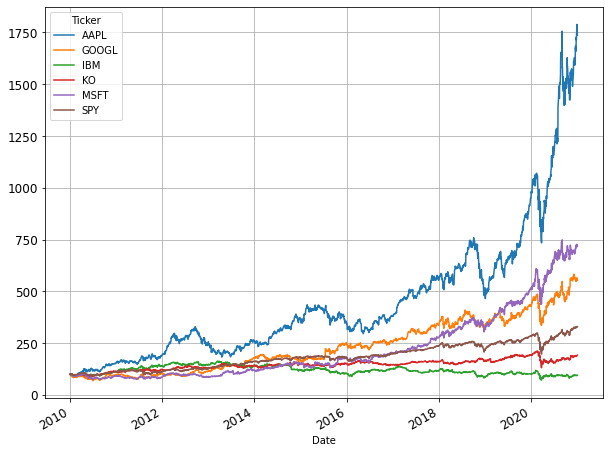

In [4]:
norm_close = close.div(close.iloc[0]).mul(100)
norm_close.plot(figsize = (10,8), fontsize =12, grid =True);

In [5]:
ret = close.pct_change().dropna()
ret.head()

Ticker,AAPL,GOOGL,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.004404,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.025209,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,-0.023280,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.013331,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.001512,-0.010470,0.020308,-0.012720,0.001397


In [6]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
GOOGL,2768.0,0.000755,0.016345,-0.116341,-0.006619,0.000686,0.008822,0.162584
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [7]:
summary = ret.describe().T.loc[:, ['mean', 'std']]
summary

,mean,std
Ticker,,
AAPL,0.001191,0.017843
GOOGL,0.000755,0.016345
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [8]:
summary['mean']*=252
summary['std']*=np.sqrt(252)

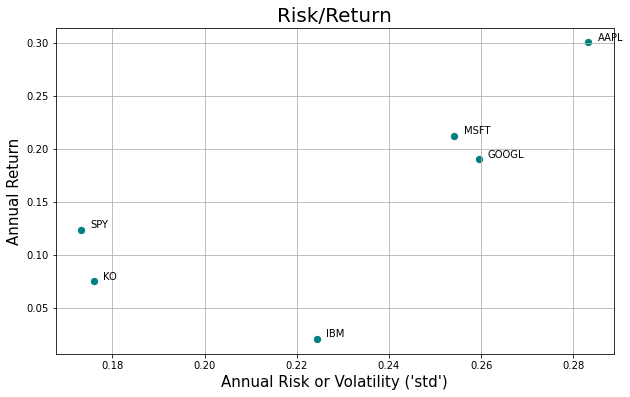

In [9]:
summary.plot.scatter(x = 'std', y='mean', figsize= (10,6), grid=True, s=40, color='teal')
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,'std']+.002, summary.loc[i,'mean']+.002))
plt.xlabel("Annual Risk or Volatility (\'std')", fontsize=15) #std = risk, coz it shows how volatile a stock is
plt.ylabel("Annual Return", fontsize=15)
plt.title("Risk/Return", fontsize=20);

## Correlation and covariance

In [10]:
ret

Ticker,AAPL,GOOGL,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.004404,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.025209,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,-0.023280,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.013331,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.001512,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24,0.007712,0.003431,0.006376,0.006782,0.007827,0.003890
2020-12-28,0.035766,0.022951,0.001043,0.013473,0.009921,0.008591
2020-12-29,-0.013315,-0.009132,-0.008172,-0.000554,-0.003601,-0.001908


In [11]:
ret.cov()

Ticker,AAPL,GOOGL,IBM,KO,MSFT,SPY
Ticker,,,,,,
AAPL,0.000318,0.000154,0.000110,0.000067,0.000158,0.000128
GOOGL,0.000154,0.000267,0.000108,0.000070,0.000159,0.000122
IBM,0.000110,0.000108,0.000200,0.000079,0.000121,0.000108
KO,0.000067,0.000070,0.000079,0.000123,0.000076,0.000077
MSFT,0.000158,0.000159,0.000121,0.000076,0.000256,0.000130
SPY,0.000128,0.000122,0.000108,0.000077,0.000130,0.000119


In [12]:
ret.corr()

Ticker,AAPL,GOOGL,IBM,KO,MSFT,SPY
Ticker,,,,,,
AAPL,1.000000,0.526642,0.436100,0.339213,0.554051,0.659557
GOOGL,0.526642,1.000000,0.465962,0.385440,0.608630,0.683659
IBM,0.436100,0.465962,1.000000,0.502436,0.533130,0.703342
KO,0.339213,0.385440,0.502436,1.000000,0.429749,0.639324
MSFT,0.554051,0.608630,0.533130,0.429749,1.000000,0.744601
SPY,0.659557,0.683659,0.703342,0.639324,0.744601,1.000000


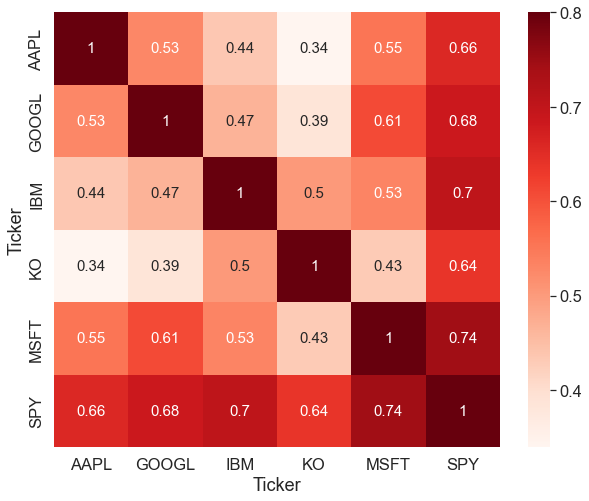

In [13]:
plt.figure(figsize=(10,8))
sns.set_theme(font_scale= 1.5)
sns.heatmap(ret.corr(), cmap = "Reds", annot=True, annot_kws={'size': 15}, vmax = 0.8)
plt.show()

## Challenge 1
Download 20 random stocks from yf
* Calculate risk/reward potential
* Compare covariance and correlation
* Find the best 5-6 stocks to invest in the long term

In [14]:
stocks = yf.download(tickers = [
'DOCS',
'GJNSF',
'HOOD',
'CDE',
'HL',
'MSTR',
'LGFRY',
'LNXSY',
'RBC',
'GMBXF',
'AFRM',
'BRLXF',
'ERO',
'FQVLF',
'EVKIY',
'AG',
'CCJ',
'HBM',
'UEC',
'NNGPF'], start='2010-01-01', end = '2024-01-01')

[*********************100%%**********************]  20 of 20 completed


In [15]:
stocks_new = pd.DataFrame(stocks)
stocks_new

Price       Adj Close                                                \
Ticker           AFRM    AG  BRLXF        CCJ        CDE       DOCS   
Date                                                                  
2010-01-04        NaN  4.10    NaN  33.240002  18.740000        NaN   
2010-01-05        NaN  4.15    NaN  32.880001  19.049999        NaN   
2010-01-06        NaN  4.28    NaN  32.750000  19.639999        NaN   
2010-01-07        NaN  4.16    NaN  32.040001  19.520000        NaN   
2010-01-08        NaN  4.28    NaN  32.209999  19.790001        NaN   
...               ...   ...    ...        ...        ...        ...   
2023-12-22  49.060001  6.26  25.07  43.619999   3.440000  27.920000   
2023-12-26  50.040001  6.37  25.07  43.889999   3.470000  28.240000   
2023-12-27  51.240002  6.42  25.07  43.619999   3.500000  28.280001   
2023-12-28  51.389999  6.19  25.07  42.900002   3.320000  28.420000   
2023-12-29  49.139999  6.15  25.00  43.099998   3.260000  28.040001   

Price                                             ...    Volume           \
Ticker            ERO  EVKIY      FQVLF    GJNSF  ...     GMBXF      HBM   
Date                                              ...                      
2010-01-04        NaN    NaN  15.720000      NaN  ...       NaN    21000   
2010-01-05        NaN    NaN  15.720000      NaN  ...  114400.0     1500   
2010-01-06        NaN    NaN  16.903999      NaN  ...  162100.0     9500   
2010-01-07        NaN    NaN  16.903999      NaN  ...   11000.0     4200   
2010-01-08        NaN    NaN  17.950001      NaN  ...   15800.0     7700   
...               ...    ...        ...      ...  ...       ...      ...   
2023-12-22  16.600000  9.945   8.320000  7.41897  ...   47000.0  1956700   
2023-12-26  16.580000  9.945   8.620000  7.41897  ...   22700.0   551500   
2023-12-27  16.510000  9.945   8.530000  7.41897  ...   22100.0  1169000   
2023-12-28  16.030001  9.945   8.350000  7.41897  ...   70500.0  1111600   
2023-12-29  15.790000  9.945   8.270000  7.41897  ...    8900.0   952100   

Price                                                                    \
Ticker            HL        HOOD    LGFRY LNXSY     MSTR  NNGPF     RBC   
Date                                                                      
2010-01-04   8421100         NaN      NaN   NaN    71600    NaN   70700   
2010-01-05   9649500         NaN      NaN   NaN   139400    NaN   59300   
2010-01-06  12415700         NaN      NaN   NaN    64700    NaN   76800   
2010-01-07  10584900         NaN      NaN   NaN   170700    NaN   65400   
2010-01-08   9791600         NaN      NaN   NaN    65200    NaN   61700   
...              ...         ...      ...   ...      ...    ...     ...   
2023-12-22   5408800  10525400.0  32600.0   0.0  1255900    0.0   97400   
2023-12-26   3317800   8151100.0  11400.0   0.0  1204700  200.0  206500   
2023-12-27   5049800  16095200.0  10900.0   0.0  2127300    0.0  113500   
2023-12-28   4627200   8604400.0  13700.0   0.0  1580800    0.0   95800   
2023-12-29   5096400  14494100.0   8200.0   0.0  1579000    0.0   86400   

Price                
Ticker          UEC  
Date                 
2010-01-04   335500  
2010-01-05   306200  
2010-01-06   209900  
2010-01-07   257400  
2010-01-08   336700  
...             ...  
2023-12-22  9119600  
2023-12-26  3288100  
2023-12-27  3456000  
2023-12-28  6358600  
2023-12-29  6786500  

[3522 rows x 120 columns]

In [16]:
returns = stocks_new['Adj Close'].pct_change().dropna()
# returns
mean_returns = returns.mean()
std_returns = returns.std()

risk_reward = pd.DataFrame({'Mean Return': mean_returns, 'Risk': std_returns})
risk_reward['Risk/Reward Potential'] = risk_reward['Mean Return'] / risk_reward['Risk']

risk_reward


,Mean Return,Risk,Risk/Reward Potential
Ticker,,,
AFRM,0.002228,0.073001,0.030526
AG,-0.000692,0.035250,-0.019636
BRLXF,-0.000137,0.020615,-0.006638
CCJ,0.001908,0.031053,0.061442
CDE,-0.000519,0.041905,-0.012394
DOCS,-0.000192,0.046486,-0.004133
ERO,0.000193,0.035394,0.005465
EVKIY,-0.000655,0.021116,-0.031016
FQVLF,-0.000700,0.041465,-0.016884


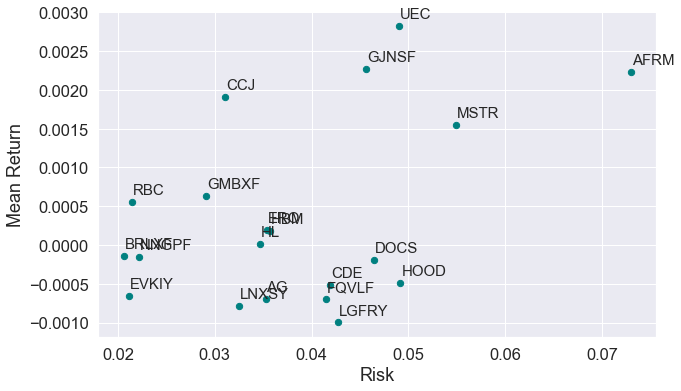

In [17]:
risk_reward.plot(kind='scatter', x='Risk', y='Mean Return', figsize=(10,6), grid=True, s=40, color='teal')
for i in risk_reward.index:
    plt.annotate(i, fontsize = 15 , xy=(risk_reward.loc[i,'Risk']+.0001, risk_reward.loc[i,'Mean Return']+.0001))
plt.show()

In [18]:
# Correlation and Covariance
returns.cov().head()

Ticker,AFRM,AG,BRLXF,CCJ,CDE,DOCS,ERO,EVKIY,FQVLF,GJNSF,GMBXF,HBM,HL,HOOD,LGFRY,LNXSY,MSTR,NNGPF,RBC,UEC
Ticker,,,,,,,,,,,,,,,,,,,,
AFRM,0.005329,0.000470,0.000262,0.000836,0.000703,0.001567,0.000708,-0.000002,0.000856,9.839310e-05,0.000467,0.000771,0.000623,0.001824,0.000417,4.069281e-05,0.002149,0.000163,0.000552,0.001365
AG,0.000470,0.001243,0.000121,0.000353,0.001103,0.000297,0.000573,-0.000007,0.000627,8.820432e-06,0.000254,0.000632,0.000964,0.000296,0.000132,-1.771245e-05,0.000546,0.000028,0.000123,0.000641
BRLXF,0.000262,0.000121,0.000425,0.000125,0.000125,0.000178,0.000109,0.000021,0.000148,1.350180e-05,0.000067,0.000145,0.000105,0.000129,0.000063,-7.743535e-07,0.000154,-0.000006,0.000049,0.000213
CCJ,0.000836,0.000353,0.000125,0.000964,0.000483,0.000490,0.000379,0.000036,0.000430,-6.622173e-07,0.000171,0.000486,0.000383,0.000340,0.000100,-3.236177e-05,0.000619,0.000055,0.000195,0.001210
CDE,0.000703,0.001103,0.000125,0.000483,0.001756,0.000314,0.000676,0.000012,0.000753,1.935881e-05,0.000337,0.000783,0.001196,0.000382,0.000157,-3.079482e-05,0.000644,0.000053,0.000210,0.000890


In [19]:
returns.corr().head()

Ticker,AFRM,AG,BRLXF,CCJ,CDE,DOCS,ERO,EVKIY,FQVLF,GJNSF,GMBXF,HBM,HL,HOOD,LGFRY,LNXSY,MSTR,NNGPF,RBC,UEC
Ticker,,,,,,,,,,,,,,,,,,,,
AFRM,1.000000,0.182482,0.174348,0.368762,0.229819,0.461853,0.273927,-0.001603,0.282825,0.029541,0.219665,0.295567,0.246007,0.508014,0.133789,0.017143,0.536502,0.100360,0.351671,0.381217
AG,0.182482,1.000000,0.166923,0.322454,0.746925,0.181006,0.459434,-0.010053,0.429151,0.005484,0.247708,0.501686,0.788716,0.170599,0.087942,-0.015453,0.282205,0.036309,0.162018,0.370821
BRLXF,0.174348,0.166923,1.000000,0.195473,0.144189,0.185275,0.149750,0.047501,0.173137,0.014355,0.111173,0.196670,0.146312,0.127165,0.071848,-0.001155,0.136572,-0.012846,0.110365,0.210327
CCJ,0.368762,0.322454,0.195473,1.000000,0.371141,0.339099,0.344463,0.054647,0.333942,-0.000467,0.189098,0.437667,0.355537,0.222553,0.075395,-0.032050,0.363460,0.080346,0.291940,0.794297
CDE,0.229819,0.746925,0.144189,0.371141,1.000000,0.161120,0.456021,0.013977,0.433417,0.010125,0.276011,0.522856,0.822538,0.185568,0.087578,-0.022601,0.280184,0.057135,0.233194,0.432846


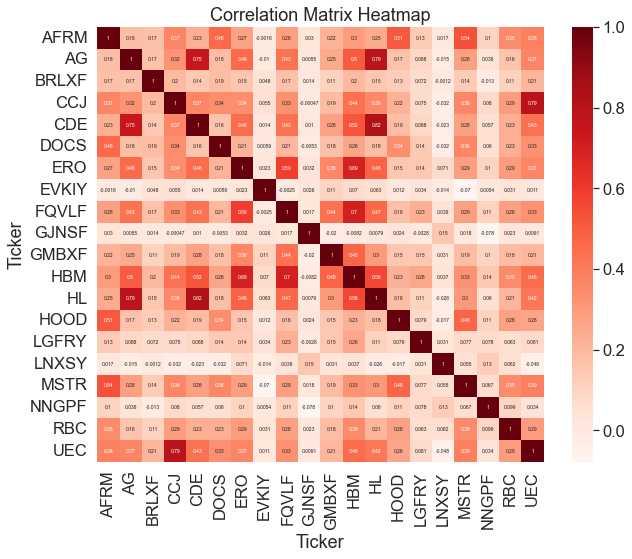

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), cmap="Reds", annot=True, annot_kws={'size': 5})
plt.title("Correlation Matrix Heatmap")
plt.show()

## Moving Averages

In [21]:
SPY = yf.download('SPY')

[*********************100%%**********************]  1 of 1 completed


In [22]:
spy = SPY.Close.to_frame()
spy

,Close
Date,
1993-01-29,43.937500
1993-02-01,44.250000
1993-02-02,44.343750
1993-02-03,44.812500
1993-02-04,45.000000
...,...
2024-06-17,547.099976
2024-06-18,548.489990
2024-06-20,547.000000


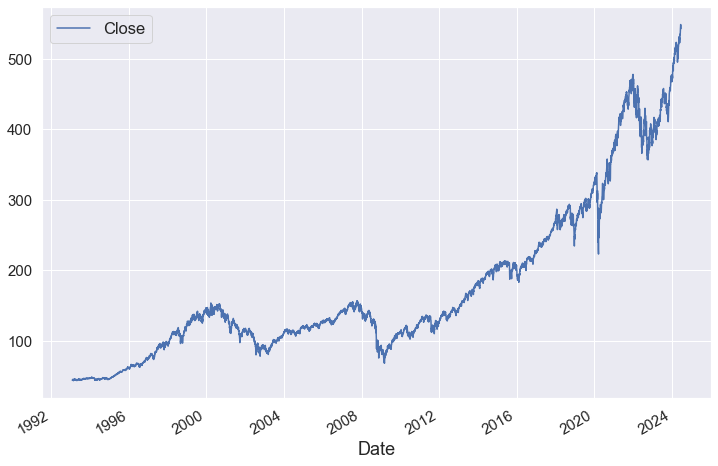

In [23]:
spy.plot(figsize=(12, 8), fontsize=15, grid=True);

In [24]:
spy_roll = spy.rolling(window = 10).mean()
spy_roll.tail(15)

,Close
Date,
2024-06-03,528.033997
2024-06-04,527.866998
2024-06-05,528.197998
2024-06-06,528.680994
2024-06-07,529.485992
2024-06-10,530.107990
2024-06-11,530.821991
2024-06-12,532.347992
2024-06-13,534.331995


In [25]:
spy.rolling(window = 10).median()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
...,...
2024-06-17,536.304993
2024-06-18,539.154999
2024-06-20,541.904999


In [26]:
spy.rolling(window=10).max().head(15)
# spy.describe()

,Close
Date,
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN


In [27]:
spy['SMA50'] = spy['Close'].rolling(window=50, min_periods=50).mean()

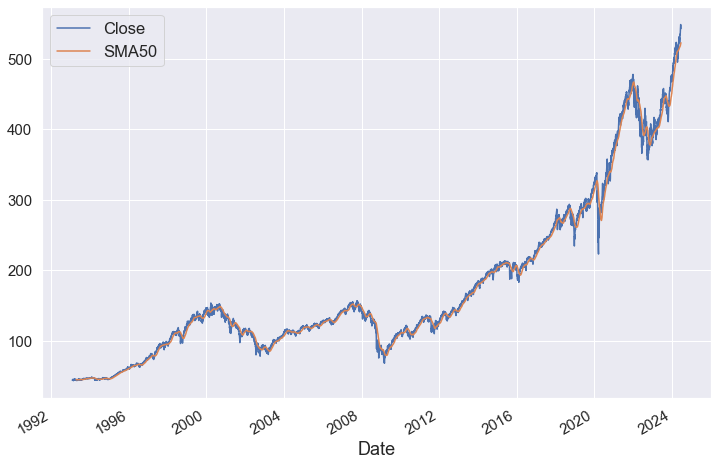

In [28]:
spy.plot(figsize=(12, 8), fontsize=15, grid=True);

In [29]:
spy['SMA200'] = spy.Close.rolling(window=200, min_periods=200).mean()
spy

,Close,SMA50,SMA200
Date,,,
1993-01-29,43.937500,NaN,NaN
1993-02-01,44.250000,NaN,NaN
1993-02-02,44.343750,NaN,NaN
1993-02-03,44.812500,NaN,NaN
1993-02-04,45.000000,NaN,NaN
...,...,...,...
2024-06-17,547.099976,520.357399,481.45905
2024-06-18,548.489990,520.952800,481.94975
2024-06-20,547.000000,521.506400,482.42880


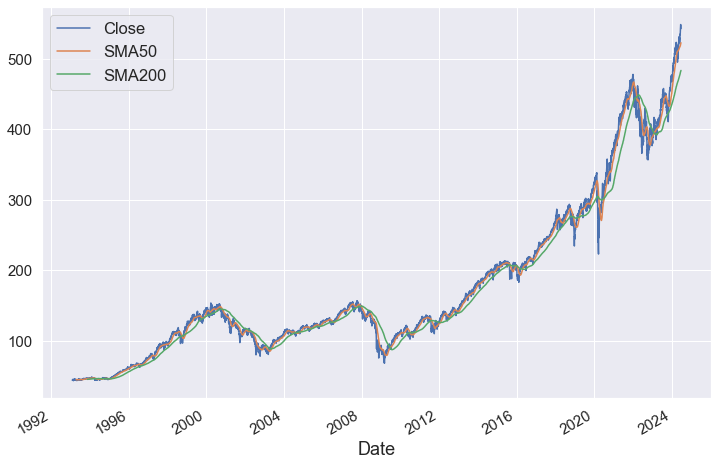

In [30]:
spy.plot(figsize=(12, 8), fontsize=15, grid=True);

## Challenge 2

In [31]:
chal_stocks = yf.download(ticker)
chal_stocks = chal_stocks['Close']
chal_stocks

[*********************100%%**********************]  6 of 6 completed


Ticker,AAPL,GOOGL,IBM,KO,MSFT,SPY
Date,,,,,,
1962-01-02,NaN,NaN,7.291268,0.263021,NaN,NaN
1962-01-03,NaN,NaN,7.355003,0.257161,NaN,NaN
1962-01-04,NaN,NaN,7.281708,0.259115,NaN,NaN
1962-01-05,NaN,NaN,7.138305,0.253255,NaN,NaN
1962-01-08,NaN,NaN,7.004461,0.250651,NaN,NaN
...,...,...,...,...,...,...
2024-06-17,216.669998,177.240005,169.500000,62.619999,448.369995,547.099976
2024-06-18,214.289993,175.089996,170.550003,62.630001,446.339996,548.489990
2024-06-20,209.679993,176.300003,173.919998,62.180000,445.700012,547.000000


In [32]:
chal_stocks_roll = chal_stocks.rolling(window=10).mean()
chal_stocks_roll

Ticker,AAPL,GOOGL,IBM,KO,MSFT,SPY
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-06-17,203.833000,175.899998,168.793001,63.410,432.257999,537.802997
2024-06-18,205.826999,176.029999,169.267001,63.279,435.284998,539.812994
2024-06-20,207.207999,176.118999,169.921001,63.105,437.453998,541.045996


In [33]:
chal_stocks_roll2 = chal_stocks.rolling(window=10).median()

<AxesSubplot:xlabel='Date'>

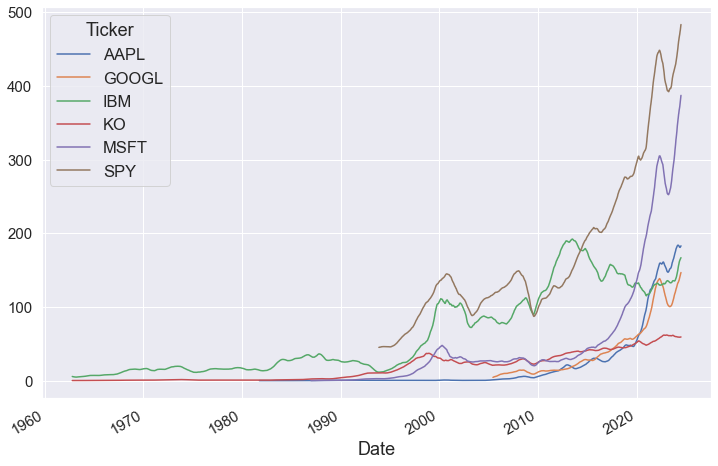

In [34]:
chal_stocks.rolling(window=200, min_periods = 200).mean().plot(figsize=(12, 8), fontsize=15, grid=True)

## Moving averages pt.2

In [35]:
spy['EMA100'] = spy['Close'].ewm(span=100, min_periods=100).mean()
spy

,Close,SMA50,SMA200,EMA100
Date,,,,
1993-01-29,43.937500,NaN,NaN,NaN
1993-02-01,44.250000,NaN,NaN,NaN
1993-02-02,44.343750,NaN,NaN,NaN
1993-02-03,44.812500,NaN,NaN,NaN
1993-02-04,45.000000,NaN,NaN,NaN
...,...,...,...,...
2024-06-17,547.099976,520.357399,481.45905,511.184272
2024-06-18,548.489990,520.952800,481.94975,511.922999
2024-06-20,547.000000,521.506400,482.42880,512.617593


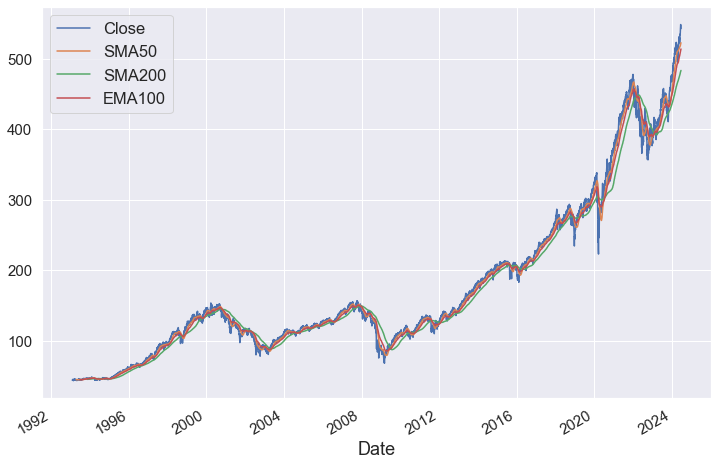

In [36]:
spy.plot(figsize=(12, 8), fontsize=15, grid=True);

In [37]:
spy['Day'] = spy.index.day_name()
spy['Quarter'] = spy.index.quarter
spy

,Close,SMA50,SMA200,EMA100,Day,Quarter
Date,,,,,,
1993-01-29,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2024-06-17,547.099976,520.357399,481.45905,511.184272,Monday,2
2024-06-18,548.489990,520.952800,481.94975,511.922999,Tuesday,2
2024-06-20,547.000000,521.506400,482.42880,512.617593,Thursday,2


In [38]:
SPY = yf.download('SPY', start='2010-12-31', end='2021-01-01')
SPY

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,125.529999,125.870003,125.330002,125.750000,125.345619,91218900
2011-01-03,126.709999,127.599998,125.699997,127.050003,126.641441,138725200
2011-01-04,127.330002,127.370003,126.190002,126.980003,126.571671,137409700
2011-01-05,126.580002,127.720001,126.459999,127.639999,127.229546,133975300
2011-01-06,127.690002,127.830002,127.010002,127.389999,126.980347,122519000
...,...,...,...,...,...,...
2020-12-24,368.079987,369.029999,367.450012,369.000000,367.813385,26457900
2020-12-28,371.739990,372.589996,371.070007,372.170013,370.973206,39000400
2020-12-29,373.809998,374.000000,370.829987,371.459991,370.265472,53680500


In [39]:
all_days = pd.date_range( start='2010-12-31', end='2021-01-01', freq='D')
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=3655, freq='D')

In [40]:
SPY = SPY['Close']

In [41]:
SPY = SPY.reindex(all_days)
SPY.to_frame()

,Close
2010-12-31,125.750000
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2020-12-28,372.170013
2020-12-29,371.459991
2020-12-30,371.989990
2020-12-31,373.880005


In [42]:
SPY.fillna(method='ffill', inplace=True)
SPY

2010-12-31    125.750000
2011-01-01    125.750000
2011-01-02    125.750000
2011-01-03    127.050003
2011-01-04    126.980003
                 ...    
2020-12-28    372.170013
2020-12-29    371.459991
2020-12-30    371.989990
2020-12-31    373.880005
2021-01-01    373.880005
Freq: D, Name: Close, Length: 3655, dtype: float64

In [43]:
SPY.fillna(method = 'bfill')

2010-12-31    125.750000
2011-01-01    125.750000
2011-01-02    125.750000
2011-01-03    127.050003
2011-01-04    126.980003
                 ...    
2020-12-28    372.170013
2020-12-29    371.459991
2020-12-30    371.989990
2020-12-31    373.880005
2021-01-01    373.880005
Freq: D, Name: Close, Length: 3655, dtype: float64

In [44]:
SPY = yf.download('SPY', interval = '1wk')
SPY

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,43.796207,1003200
1993-02-01,43.968750,45.093750,43.968750,44.968750,44.824142,2234800
1993-02-08,44.968750,45.125000,44.531250,44.593750,44.450348,1159800
1993-02-15,44.468750,44.468750,42.812500,43.562500,43.422413,998700
1993-02-22,43.687500,44.437500,43.468750,44.406250,44.263451,1024300
...,...,...,...,...,...,...
2024-05-27,530.270020,530.510010,518.359985,527.369995,525.674133,218714200
2024-06-03,529.020020,536.890015,522.599976,534.010010,532.292786,203111800
2024-06-10,533.179993,544.119995,532.049988,542.780029,541.034607,220214800


## Cumulative returns, drawdowns, etc.

In [111]:
apple = yf.download('AAPL') 

[*********************100%%**********************]  1 of 1 completed


In [112]:
apple.Close

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2024-06-17    216.669998
2024-06-18    214.289993
2024-06-20    209.679993
2024-06-21    207.490005
2024-06-24    208.139999
Name: Close, Length: 10973, dtype: float64

In [113]:
apple = apple["Close"]

In [114]:
apple = apple.to_frame()

In [115]:
apple['d_returns'] = np.log(apple['Close'].div(apple['Close'].shift(1)))

In [117]:
apple

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2024-06-17,216.669998,0.019480
2024-06-18,214.289993,-0.011045
2024-06-20,209.679993,-0.021748


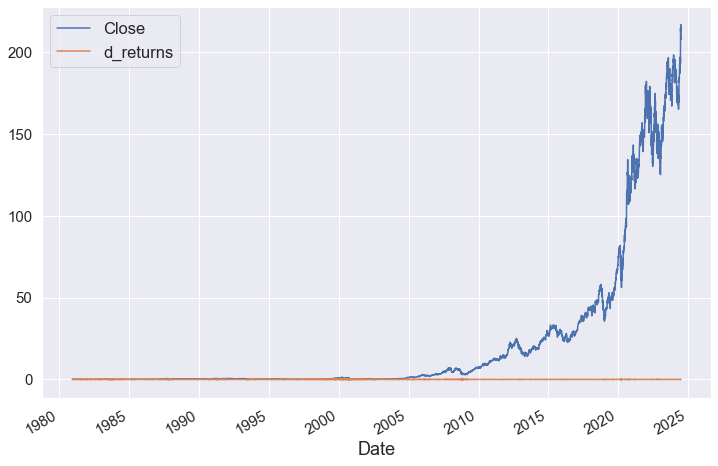

In [116]:
apple.plot( figsize=(12, 8), fontsize=15, grid=True);

In [118]:
apple.dropna(inplace=True)

In [119]:
apple

,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2024-06-17,216.669998,0.019480
2024-06-18,214.289993,-0.011045
2024-06-20,209.679993,-0.021748


In [120]:
apple.d_returns.sum()

7.39122093679707

In [121]:
np.exp(apple.d_returns.sum())

1621.6848794560342

In [122]:
apple['cum_returns'] = apple.d_returns.cumsum().apply(np.exp)

In [123]:
apple

,Close,d_returns,cum_returns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2024-06-17,216.669998,0.019480,1688.144811
2024-06-18,214.289993,-0.011045,1669.601436
2024-06-20,209.679993,-0.021748,1633.683457


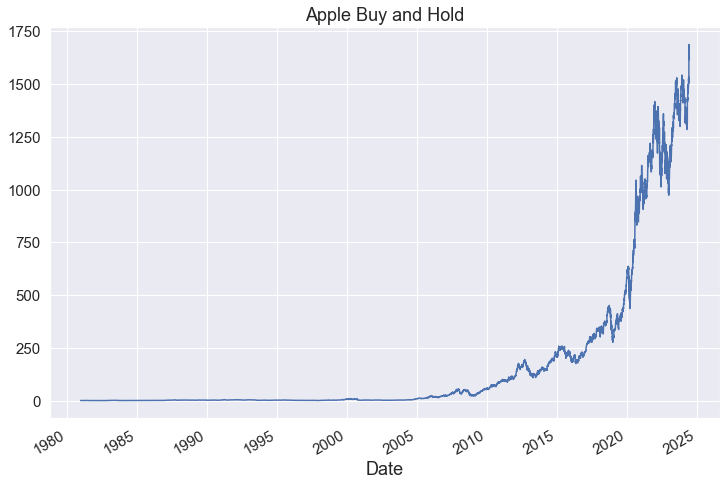

In [124]:
apple['cum_returns'].plot(figsize=(12, 8), fontsize=15, grid=True, title = 'Apple Buy and Hold');

## How to calculate drawdowns

In [125]:
apple['cum_max'] = apple.cum_returns.cummax()

In [126]:
apple

,Close,d_returns,cum_returns,cum_max
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2024-06-17,216.669998,0.019480,1688.144811,1688.144811
2024-06-18,214.289993,-0.011045,1669.601436,1688.144811
2024-06-20,209.679993,-0.021748,1633.683457,1688.144811


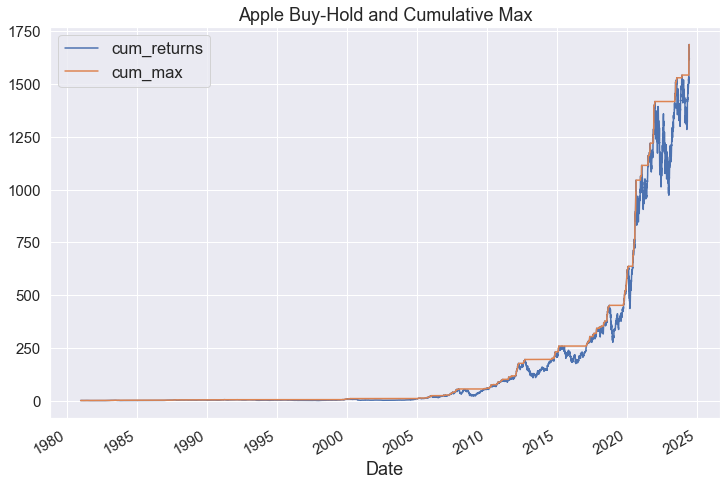

In [127]:
apple[['cum_returns', 'cum_max']].plot(figsize=(12, 8), fontsize=15, grid=True, title = 'Apple Buy-Hold and Cumulative Max');

In [128]:
apple['Drawdown'] =  apple['cum_max'] - apple['cum_returns']

In [129]:
apple.rename(columns = {'Drawdown': 'drawdown'}, inplace=True)

In [130]:
apple

,Close,d_returns,cum_returns,cum_max,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2024-06-17,216.669998,0.019480,1688.144811,1688.144811,0.000000
2024-06-18,214.289993,-0.011045,1669.601436,1688.144811,18.543374
2024-06-20,209.679993,-0.021748,1633.683457,1688.144811,54.461354


In [131]:
apple['drawdown'].idxmax() 

Timestamp('2023-01-05 00:00:00')

In [132]:
apple.loc[apple.index<=apple['drawdown'].idxmax()]

,Close,d_returns,cum_returns,cum_max,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2022-12-29,129.610001,0.027931,1009.832703,1418.097708,408.265004
2022-12-30,129.929993,0.002466,1012.325863,1418.097708,405.771845
2023-01-03,125.070000,-0.038122,974.460113,1418.097708,443.637594


In [133]:
apple['drawdown%'] = (apple['cum_max'] - apple['cum_returns'])/ apple['cum_max']

In [134]:
apple

,Close,d_returns,cum_returns,cum_max,drawdown,drawdown%
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
2024-06-17,216.669998,0.019480,1688.144811,1688.144811,0.000000,0.000000
2024-06-18,214.289993,-0.011045,1669.601436,1688.144811,18.543374,0.010984
2024-06-20,209.679993,-0.021748,1633.683457,1688.144811,54.461354,0.032261


In [135]:
apple['drawdown%'].max()

0.82216567924191

In [137]:
apple.loc[apple['drawdown%'].idxmax()].to_frame()

,1997-12-23
Close,0.115513
d_returns,-0.028580
cum_returns,0.899998
cum_max,5.060882
drawdown,4.160883
drawdown%,0.822166


## SMA Strategy

In [ ]:
data = apple['Close'].loc[(apple.index >= apple['drawdown%'].idxmax())]